In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee = pd.read_csv('../Data/final_df_copy.csv')

In [3]:
refugee

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty
0,Afghanistan,AFG,Asia,6.434000e+03,2.575530e+05,3.400000,122.810000,Republic,1.919900e+04,1.050900e+05,327.0000,77.000000,2.370072e+07,3.086420e+05,1.0,49.300000,50.700000,0.0,36.000000
1,Angola,AGO,Africa,1.515500e+04,1.553700e+04,9.157481,25.420000,Republic,1.026430e+05,8.743600e+04,1010.0000,36.000000,2.589580e+05,7.172000e+03,0.0,50.400000,49.600000,0.0,40.500000
2,Albania,ALB,Europe,7.600000e+01,7.900000e+01,4.500000,6.860000,Constitutional monarchy,1.145600e+04,5.761600e+04,1485.0000,218.000000,1.518412e+07,6.989800e+04,0.0,49.900000,50.100000,0.0,14.300000
3,United Arab Emirates,ARE,Asia,5.380000e+02,6.580000e+02,0.920000,0.626000,Republic,3.702930e+05,7.826981e+06,78.0000,218.000000,2.012164e+07,9.204300e+04,0.0,29.900000,70.100000,0.0,19.500000
4,Argentina,ARG,South America,3.276000e+03,3.142000e+03,5.500000,0.938000,Constitutional monarchy,5.480550e+05,1.885678e+06,591.0000,19.200000,4.616000e+06,2.403240e+05,0.0,51.100000,48.900000,0.0,30.000000
5,Armenia,ARM,Europe,3.296000e+03,1.930900e+04,2.500000,2.780000,Republic,1.056100e+04,3.170010e+05,562.0000,245.000000,3.134900e+07,1.277240e+05,0.0,48.600000,51.400000,0.0,35.800000
6,French Southern and Antarctic Lands,ATF,NaN,6.820563e+04,1.036349e+05,9.157481,15.105688,NaN,4.607422e+05,1.440562e+06,1110.7875,557.701341,3.375914e+07,2.781593e+05,0.0,49.945342,50.054658,0.0,29.451064
7,Australia,AUS,Oceania,2.180500e+04,3.682700e+04,1.300000,3.060000,Republic,1.339539e+06,6.763663e+06,534.0000,1318.875000,2.147790e+07,1.321415e+05,0.0,50.200000,49.800000,0.0,29.451064
8,Austria,AUT,Europe,4.263000e+04,7.215800e+04,0.550000,3.010000,Constitutional monarchy,3.740560e+05,1.492374e+06,1110.0000,236.920000,9.169818e+07,3.870480e+05,0.0,51.200000,48.800000,0.0,6.200000
9,Azerbaijan,AZE,Europe,1.891000e+03,1.269000e+03,2.000000,7.010000,Constitutional monarchy,5.304700e+04,3.238430e+05,447.0000,249.000000,7.129300e+04,2.850000e+02,0.0,50.300000,49.700000,0.0,6.000000


# Linear Regression

In [83]:
#A simple Linear Regression that predicts the number of refugees in 2015 based on the number of refugees in
#2010, population density of each country (total number of population / area in sq mi), population, recent Famine
#in 15 years, Female and Male population.

value = refugee.filter(regex = 'Ref|Dens|Pop|Fam|Fem|Mal')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values

lm = LinearRegression()
model = lm.fit(X, y)
scores = cross_val_score(lm, X, y, cv=5)
print "R2", np.mean(scores)

R2 0.421776724633


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


# Logistic Regression

In [95]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [103]:
#Logistic Regression looking into the Civil War binary value, based on the number of Refugees in 2010, 2015, Murder
#Rate, Children out of primary school, area of a country, and recent famine in the past 15 years.

value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [122]:
#Using grid search I was able to find the parameters that best fit the model.

lr_params = {
    'penalty':['l2'],
    'solver':['liblinear'],
    'C':np.linspace(1, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_
print lr_gs.best_params_

#The cv indices splits the y value into 5 folds, using StratifiedKFold.
cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

#Run through the folds and create a test and train set and fit the model.
for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

#The logisitic model does better than the baseline accuracy.

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s


{'penalty': 'l2', 'C': 1.0, 'solver': 'liblinear'}
----------------------
Logistic Regression: 0.949019607843
Baseline accuracy: 0.0454545454545


[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.9s finished


In [116]:
#The Logistic regression predicts the countrys with a famine in the past 15 years based on the 
#number of refugees in 2010, 2015, Murder Rate, Primary school children out of school, Area, and recent Civil War.

value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Fam')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Famine'].values

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

#Grid Search finds the best parameters that fits the model.
lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_
print lr_gs.best_params_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

#Iterate through the test and train set of cv indices.
for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s


{'penalty': 'l1', 'C': 0.0001, 'solver': 'liblinear'}
----------------------
Logistic Regression: 0.920616246499
Baseline accuracy: 0.0795454545455


[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


# ROC Curve

In [117]:

value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

lm = LogisticRegression()
model = lm.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [118]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()
    fig.savefig(varname+'.png')

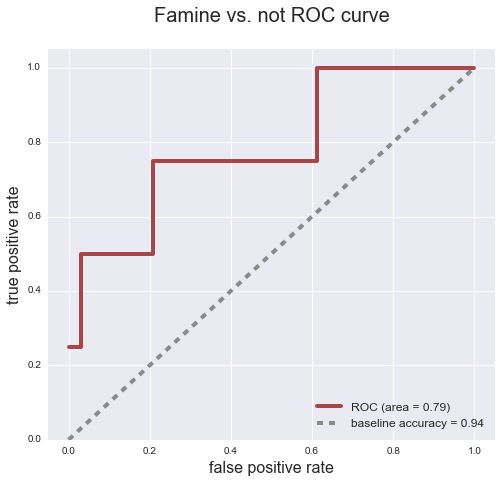

In [119]:
plot_roc(lm, X_test, y_test, 'Famine')

In [120]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee['Civil'].values

lm2 = LogisticRegression()
model = lm2.fit(Xn2, y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xn2, y2, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


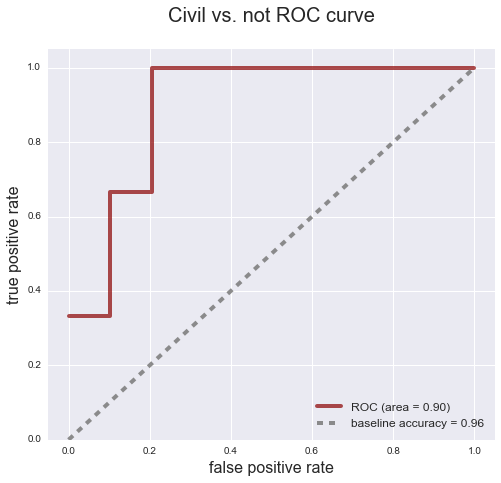

In [121]:
plot_roc(lm2, X_test2, y_test2, 'Civil')

# Precision Recall Curve

In [14]:
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

In [46]:
def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()
    fig.savefig(varname+'.png')

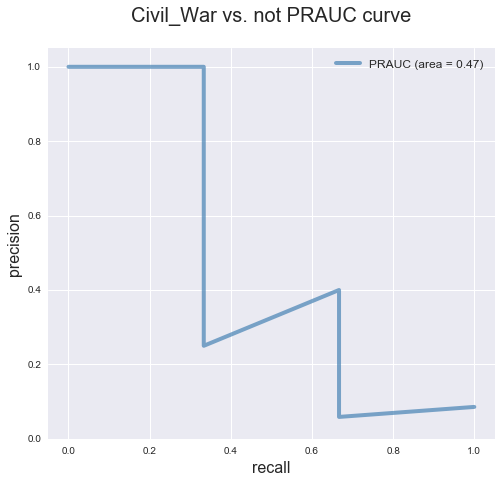

In [47]:
plot_prauc(lm2, X_test2, y_test2, 'Civil_War')

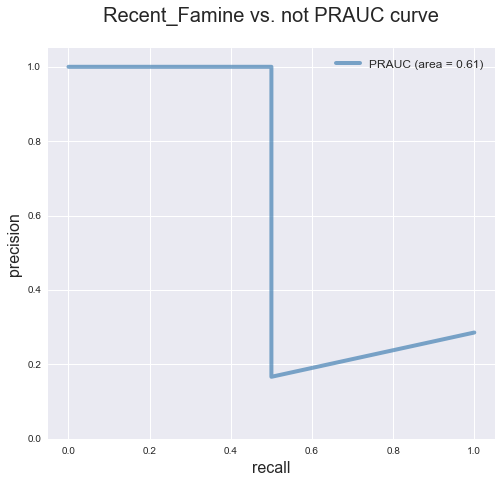

In [48]:
plot_prauc(lm, X_test, y_test, 'Recent_Famine')

# Decision Tree

In [18]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn2, y2, test_size=0.3)

## Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier()

## Search parameters
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [19]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [20]:
## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs.best_score_

best estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


best parameters {'max_features': 'sqrt', 'min_samples_split': 30, 'max_depth': None}


best score 0.959349593496


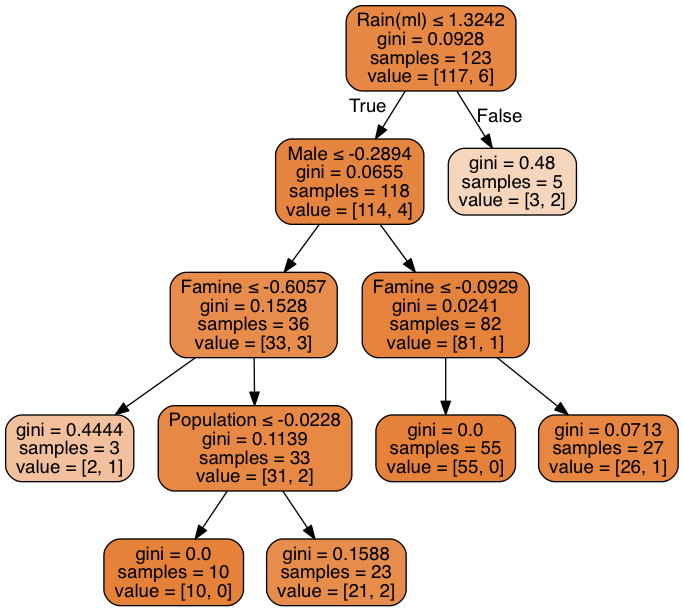

In [32]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [33]:
graph.write_pdf("iris.pdf") 

True

# PCA

In [22]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [23]:
value = refugee.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X.values)

PCA(copy=True, n_components=6, whiten=False)

In [25]:
pcs = pca.transform(X)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y, cv=5)
print np.mean(pca_scores)

0.418109452929


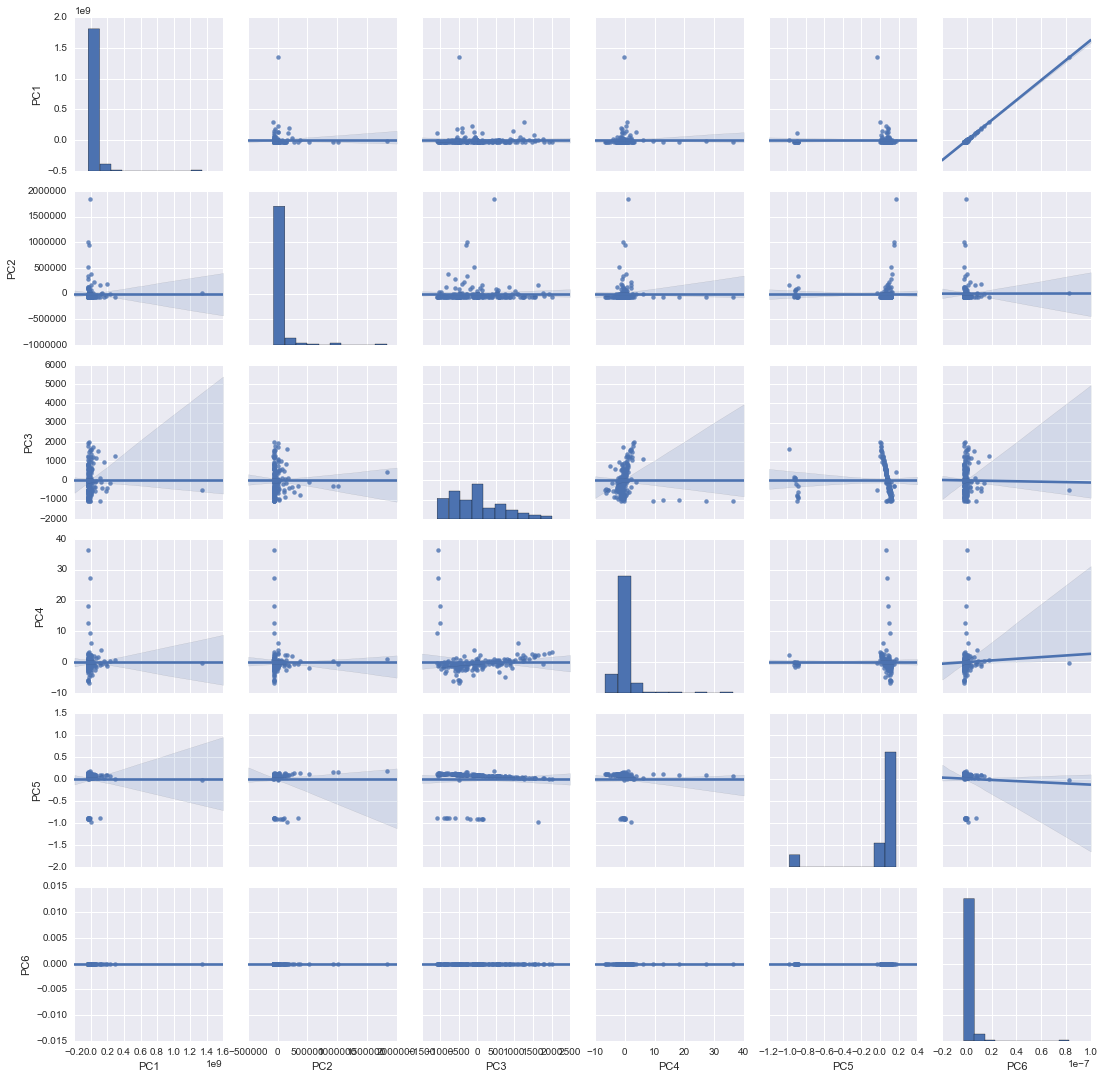

In [34]:
pca_graph = sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']), kind='reg')
pca_graph

In [35]:
pca_graph.savefig("pca_image.png")